In [ ]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class LogisticRegression_:
    def __init__(self, eta=0.1, tmax=1000, bs=1_000_000):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = bs
        self.w = None

    # Infere o vetor w da função hipótese
    # Executa a minimização do erro de entropia cruzada
    # pelo algoritmo gradiente de descida (batch ou estocástico)
    def fit(self, _X, _y):
        X = np.array(_X)
        y = np.array(_y)
        N = X.shape[0]
        d = X.shape[1]
        # inicializa w com zeros
        self.w = np.zeros(d)

        for t in range(self.tmax):
            # escolhe entre batch completo (GD) ou amostra (SGD)
            if self.batch_size < N:
                indexes = sample(range(N), self.batch_size)
                X_batch = np.array([_X[i] for i in indexes])
                y_batch = np.array([_y[i] for i in indexes])
            else:
                X_batch = X
                y_batch = y

            # computa o somatório do gradiente
            somatorio = np.zeros(d)
            for i in range(X_batch.shape[0]):
                xi = X_batch[i]
                yi = y_batch[i]
                somatorio += (yi * xi) / (1 + np.exp(yi * (np.dot(self.w, xi))))

            # gradiente médio de cross‑entropy
            gt = (-1 / N) * somatorio

            # critério de parada: gradiente pequeno
            if LA.norm(gt) < 1e-3:
                print(f"Critério de parada atingido em {t+1} iterações")
                break

            # atualização dos pesos
            self.w = self.w - (self.eta * gt)
        else:
            print(f"Máximo de iterações ({self.tmax}) atingido sem convergir")

        print(f"Quantidade de iterações = {t+1}")
        return self.w

    # função retorna a probabilidade da classe 1 (numero entre 0 e 1)
    def predict_prob(self, X):
        return 1 / (1 + np.exp(-np.dot(X, self.w)))

    # Predição de classe — sinal de w·x
    def predict(self, X):
        return np.sign(np.dot(X, self.w))

    def getW(self):
        return self.w

    # Ajuste para vetor w de tamanho 2 (sem intercept)
    # Reta de decisão y = a*x + b
    def getRegressionY(self, regressionX):
        # coeficiente angular
        a = - self.w[0] / self.w[1]
        # intercept (aqui zero, pois não há termo independente)
        b = 0
        return a * regressionX + b


Critério de parada atingido em 643 iterações
Quantidade de iterações = 643
Pesos aprendidos: [ 3.30959041 -1.68444828]
Acurácia no teste: 92.00%


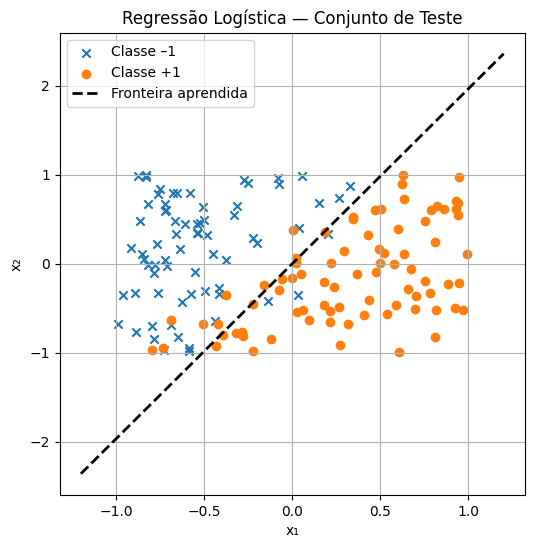

In [ ]:

if __name__ == "__main__":
    # 1) Gera dados sintéticos em 2D
    np.random.seed(42)
    N = 500
    X = np.random.uniform(-1, 1, size=(N, 2))
    w_true = np.array([2.0, -1.0])
    b_true = 0.3
    scores = X.dot(w_true) + b_true + np.random.randn(N) * 0.5
    y = np.where(scores > 0, 1, -1)

    # 2) Separa em treino/teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # 3) Treina
    clf = LogisticRegression_(eta=0.5, tmax=5000, bs=50)
    w_learned = clf.fit(X_train, y_train)
    print("Pesos aprendidos:", w_learned)

    # 4) Avalia
    y_pred = clf.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f"Acurácia no teste: {accuracy*100:.2f}%")

    # 5) Plota fronteira sem erro
    plt.figure(figsize=(6,6))
    plt.scatter(X_test[y_test<0,0], X_test[y_test<0,1], marker='x', label='Classe –1')
    plt.scatter(X_test[y_test>0,0], X_test[y_test>0,1], marker='o', label='Classe +1')

    xs = np.linspace(-1.2, 1.2, 200)
    ys = clf.getRegressionY(xs)
    plt.plot(xs, ys, 'k--', linewidth=2, label='Fronteira aprendida')

    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title('Regressão Logística — Conjunto de Teste')
    plt.legend()
    plt.grid(True)
    plt.show()